# Movie Reviews Classification with NLP using TF-IDF and LinearSVC

## Overview
This project focuses on building a machine learning model to classify movie reviews into positive or negative sentiments. The Natural Language Processing (NLP) techniques employed include the TF-IDF vectorization method for feature extraction and Linear Support Vector Classification (LinearSVC) for effective sentiment analysis.

In [1]:
import numpy as np
import pandas as pd

## Dataset
The dataset used for training and evaluation consists of a collection of movie reviews labeled with their corresponding sentiments (positive or negative). It is crucial to have a well-balanced dataset to ensure the model's robustness.

In [2]:
df = pd.read_csv('../TextFiles/moviereviews2.tsv', sep='\t')

In [3]:
df.head()

,label,review
0,pos,I loved this movie and will watch it again. Or...
1,pos,"A warm, touching movie that has a fantasy-like..."
2,pos,I was not expecting the powerful filmmaking ex...
3,neg,"This so-called ""documentary"" tries to tell tha..."
4,pos,This show has been my escape from reality for ...


In [4]:
len(df)

6000

## Data Cleaning
Before proceeding with training the model, it's essential to clean the data by addressing certain issues:

- **Remove Empty Reviews:**
  - Remove any entries in the dataset where the review text is empty.

In [5]:
df.isnull().sum()

label      0
review    20
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
len(df)

5980

- **Remove Reviews with Spaces Only:**
  - Exclude reviews that consist of spaces only, as they do not contribute meaningful information to the model.

In [8]:
df[df['review'].str.isspace()]

,label,review


In [9]:
df['label'].value_counts()

label
pos    2990
neg    2990
Name: count, dtype: int64

## Train-Test Split

To assess the performance of the movie reviews classification model, it is essential to split the dataset into training and testing sets. This separation allows the model to be trained on one subset of the data and evaluated on another, providing an unbiased estimate of its generalization to unseen data

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df['review']
y = df['label']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Pipeline Creation

A pipeline is a convenient way to streamline the machine learning workflow, combining multiple processing steps into a single entity. In this project, a pipeline is used to seamlessly integrate TF-IDF vectorization and select better model between Linear Support Vector Classification (LinearSVC) and Naive Bayes.

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
#Classifiers 
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

In [14]:
review_clf_svc = Pipeline([('TfIdf', TfidfVectorizer()),('SVC', LinearSVC())])
review_clf_nb = Pipeline([('TfIdf', TfidfVectorizer()),('NB', MultinomialNB())])

In [15]:
review_clf_svc.fit(X_train, y_train)

C:\Users\moham\anaconda3\envs\nlp_course\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Pipeline(steps=[('TfIdf', TfidfVectorizer()), ('SVC', LinearSVC())])

In [16]:
review_clf_nb.fit(X_train, y_train)

Pipeline(steps=[('TfIdf', TfidfVectorizer()), ('NB', MultinomialNB())])

In [17]:
svc_predictions = review_clf_svc.predict(X_test)

In [18]:
nb_predictions = review_clf_nb.predict(X_test)

## Evaluate Model Performance

After training the movie reviews classification model, it's crucial to assess its performance using metrics such as the confusion matrix and classification report.

In [19]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
def draw_conf_matrix(conf_matrix, model_name):
    conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual Negative',  'Actual Positive'],
                                   columns=['Predicted Negative', 'Predicted Positive'])

    # Display the confusion matrix DataFrame
    print(f"Confusion Matrix of {model_name}:")
    print(conf_matrix_df)

#### Performance metrix for SVC

In [21]:
conf_matrix_svc = confusion_matrix(y_test, svc_predictions)

In [22]:
draw_conf_matrix(conf_matrix_svc, "SVC")

Confusion Matrix of SVC:
                 Predicted Negative  Predicted Positive
Actual Negative                 900                  91
Actual Positive                  63                 920


In [23]:
clf_rep_SVC = classification_report(y_test, svc_predictions)
print(clf_rep_SVC)

              precision    recall  f1-score   support

         neg       0.93      0.91      0.92       991
         pos       0.91      0.94      0.92       983

    accuracy                           0.92      1974
   macro avg       0.92      0.92      0.92      1974
weighted avg       0.92      0.92      0.92      1974



#### Performance metrix for Naïve Bayes

In [24]:
conf_matrix_nb  = confusion_matrix(y_test, nb_predictions)

In [25]:
draw_conf_matrix(conf_matrix_nb, "Naïve Bayes")

Confusion Matrix of Naïve Bayes:
                 Predicted Negative  Predicted Positive
Actual Negative                 940                  51
Actual Positive                 136                 847


In [26]:
clf_rep_nb = classification_report(y_test, nb_predictions)
print(clf_rep_nb)

              precision    recall  f1-score   support

         neg       0.87      0.95      0.91       991
         pos       0.94      0.86      0.90       983

    accuracy                           0.91      1974
   macro avg       0.91      0.91      0.91      1974
weighted avg       0.91      0.91      0.91      1974



### confusion matrix comparison

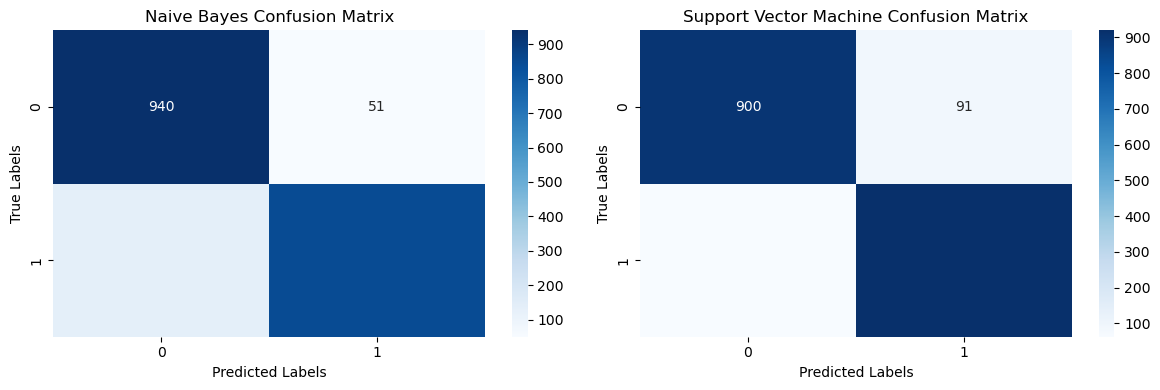

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title('Naive Bayes Confusion Matrix')
ax[0].set_xlabel('Predicted Labels')
ax[0].set_ylabel('True Labels')

sns.heatmap(conf_matrix_svc, annot=True, fmt='d', cmap='Blues', ax=ax[1])
ax[1].set_title('Support Vector Machine Confusion Matrix')
ax[1].set_xlabel('Predicted Labels')
ax[1].set_ylabel('True Labels')

plt.tight_layout()

## Conclusion
This project aims to demonstrate the application of NLP techniques, specifically TF-IDF vectorization, LinearSVC and Naïve Bayes in classifying movie reviews based on their sentiments. The model's performance will be assessed to determine its suitability for real-world sentiment analysis tasks.